# **Data Analysis with NY Airbnb Data (Regression)**
Data Source: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

**1.   Data Import and Cleansing**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data Import
airbnb=pd.read_csv('/content/drive/MyDrive/2021512016/Colab_Notebooks/AB_NYC_2019.csv')
airbnb.drop(['name','host_name','last_review'], axis=1, inplace=True)
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

> There are total 48,895 listings.
> Only 'review per month' field has null values ==> need to convert null values to 0



In [ ]:
# reviews_per_month: convert null value to 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# check null values again
airbnb.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**2.   Data Analysis & Visualization**

   **2.1 Correlation Analysis**

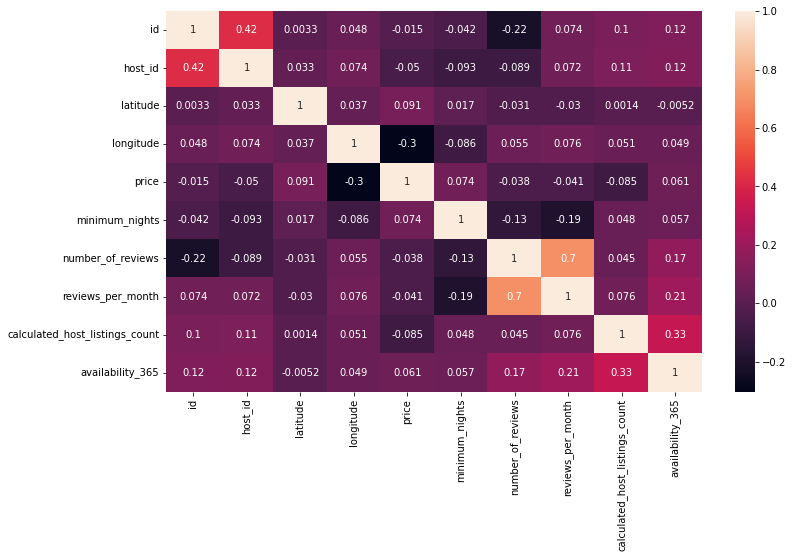

In [ ]:
# Correlation between fields
corr = airbnb.corr(method='kendall')

# Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

> No significant correlation found, excepting 'number of reviews' and 'review per month',

Text(0.5, 1.0, 'Neighbourhood Group')

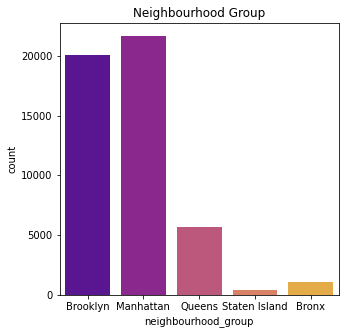

In [ ]:
# Distribution of the listings By neighborhood Group
import seaborn as sns
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Neighbourhood Group')

> Manhattan has the most listings, followed by Brooklyn. The majority of the listings are in those two neighborhoods

Text(0.5, 1.0, 'Room Type')

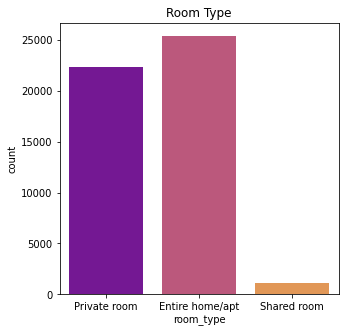

In [ ]:
# By Room Type
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Room Type')

> By room type, Entire home/apt is the most common room type, followed by private room. only a few listings are share room type.

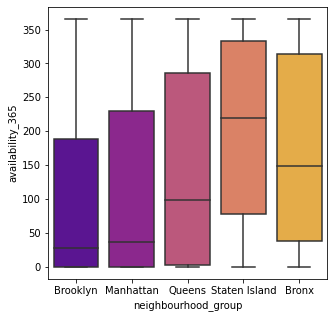

In [ ]:
# relationship between Neighborhood Group & Availability using boxplot
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

> There are siginificant difference in availability among neighborhood. Brooklyn is showing the lowest availabilty throughout the year.

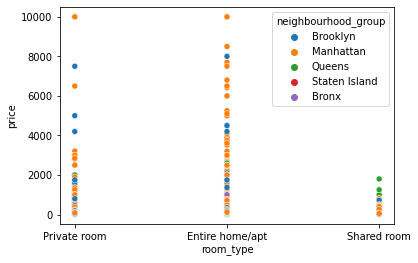

In [ ]:
# Relationship among room type, price and neighborhood
sns.scatterplot(x='room_type', y='price',  hue="neighbourhood_group", data=airbnb)

> As expected, the price for entir room type priced higher than other room types, and shared room priced the lowest. Private room also has some higly priced listings, but considered as an outliers.

**2-2 Plot on Map**

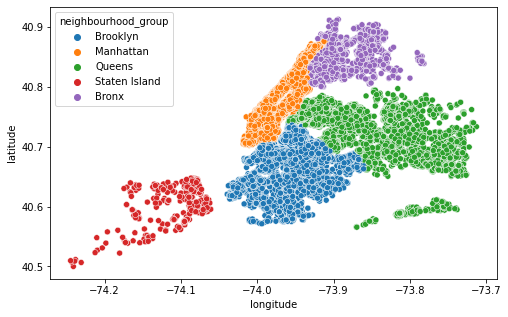

In [ ]:
# plot on map using latitude and logitude
plt.figure(figsize=(8,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

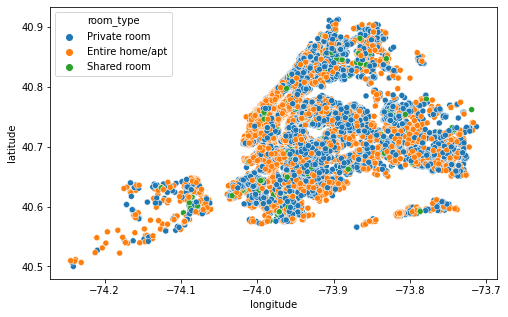

In [ ]:
# mark with room type
plt.figure(figsize=(8,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

**2-3 Regression Analysis**

In [ ]:
# drop columns that is not necessary for regression analysis
airbnb.drop(['id','host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

# check dataset
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [ ]:
# encode varchar format fields, neigborhood group and room type
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())
airbnb_en.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


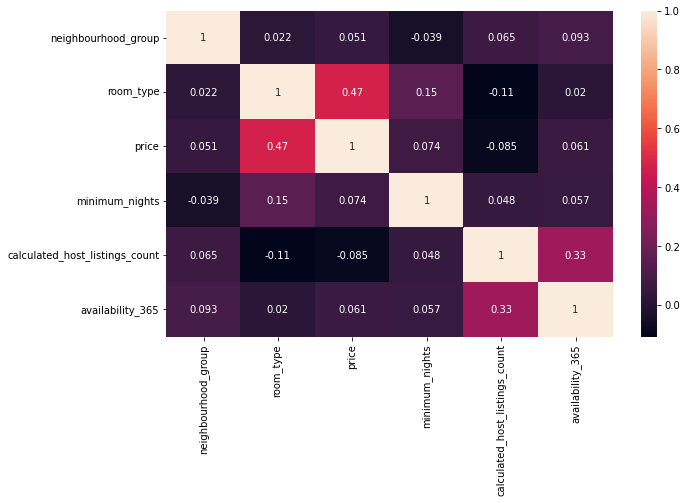

In [ ]:
# plot heatmap to show correlation
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

> price & room type shows the highest correlation of 0.47.

In [ ]:
# import libraries for regression analysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
# set dependet var and explanatory variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']

# divide into Test and Train dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [ ]:
# Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07480306392848757

> R2 = 7.4%, we can conclude that this model is not suitable for predicting price